In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import scipy.stats
import tensorflow_probability as tfp
import tensorflow as tf
import seaborn as sns
from sampler import run_sampling, plot_mcmc_marginals

# Inv-Wishart sampling

In [3]:
n = 2
n_samples = 1000
V = np.eye(n) # Scale matrix
K = n + 2 # note: We need K > n + 1 to have the convergence of the mean(see https://en.wikipedia.org/wiki/Inverse-Wishart_distribution)
Ps_prev = scipy.stats.invwishart.rvs(df=K, scale=V, size=1) # Draw a starting sample (P matrix)
Ls_prev_array = tfp.math.fill_triangular_inverse(scipy.linalg.cholesky(Ps_prev, lower=True), upper=False) # Compute P = LL^T and take L (in array form)
accepted_samples_jacobian, samples_jacobian = run_sampling(Ls_prev_array, n_samples, 0.3, V, K, jacobian=True)
accepted_samples_nojacobian, samples_nojacobian = run_sampling(Ls_prev_array, n_samples, 0.3, V, K, jacobian=False)
samples_invwishart = scipy.stats.invwishart.rvs(df=K, scale=V, size=n_samples)
print('Globally accepted samples (jacobian): ',(np.sum(accepted_samples_jacobian)/len(samples_jacobian)) * 100)
print('Globally accepted samples (no jacobian): ',(np.sum(accepted_samples_nojacobian)/len(samples_nojacobian)) * 100)

Globally accepted samples (jacobian):  35.5
Globally accepted samples (no jacobian):  23.400000000000002


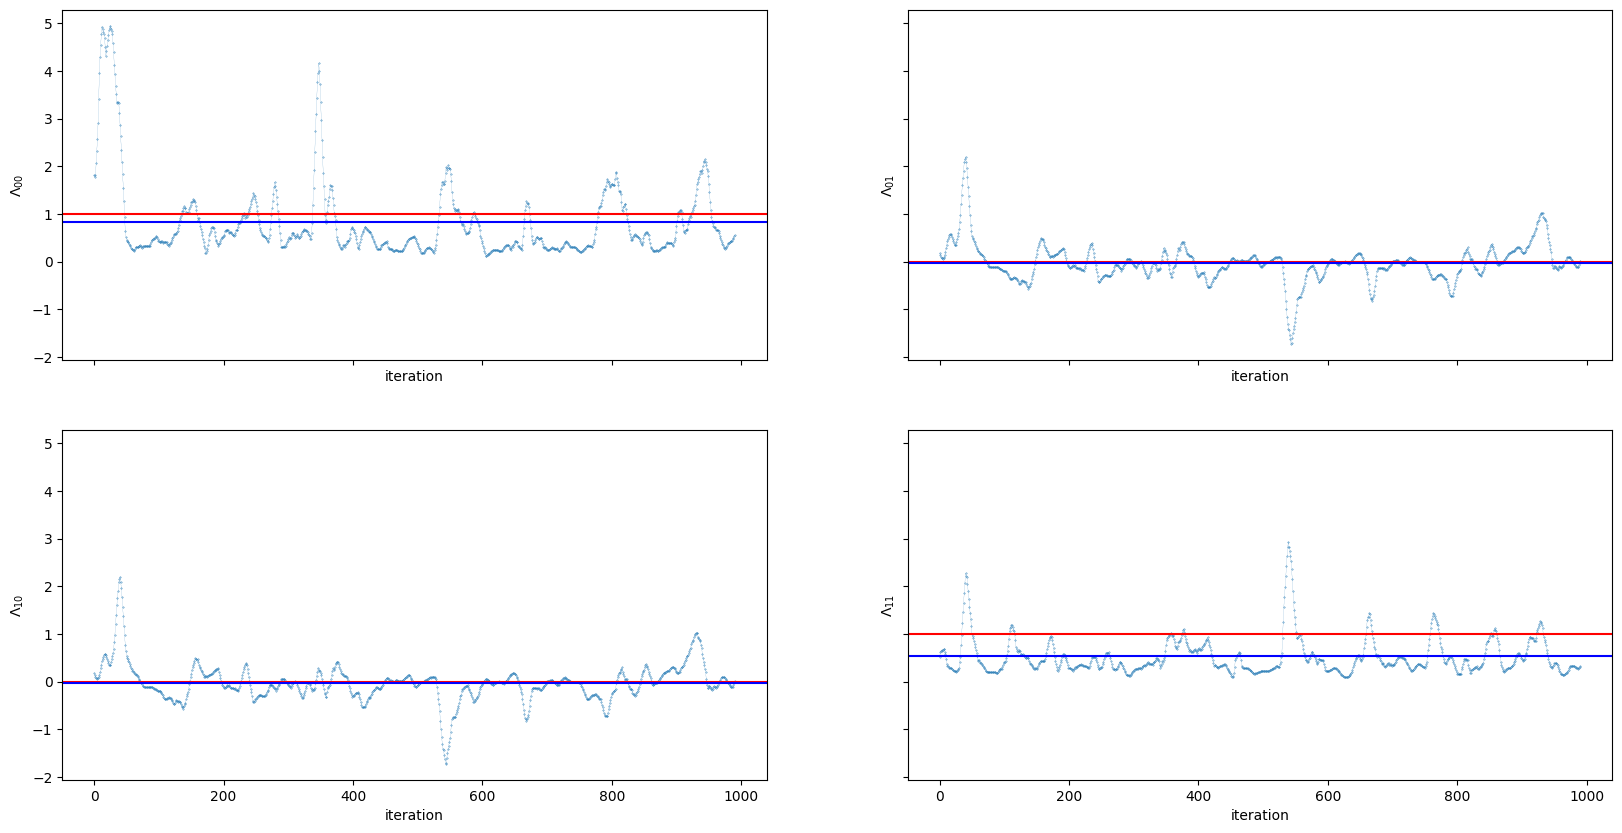

In [7]:
samples_mean_jacobian, samples_var_jacobian, tm, tv = plot_mcmc_marginals(n, V, K, samples_jacobian, samples_invwishart)

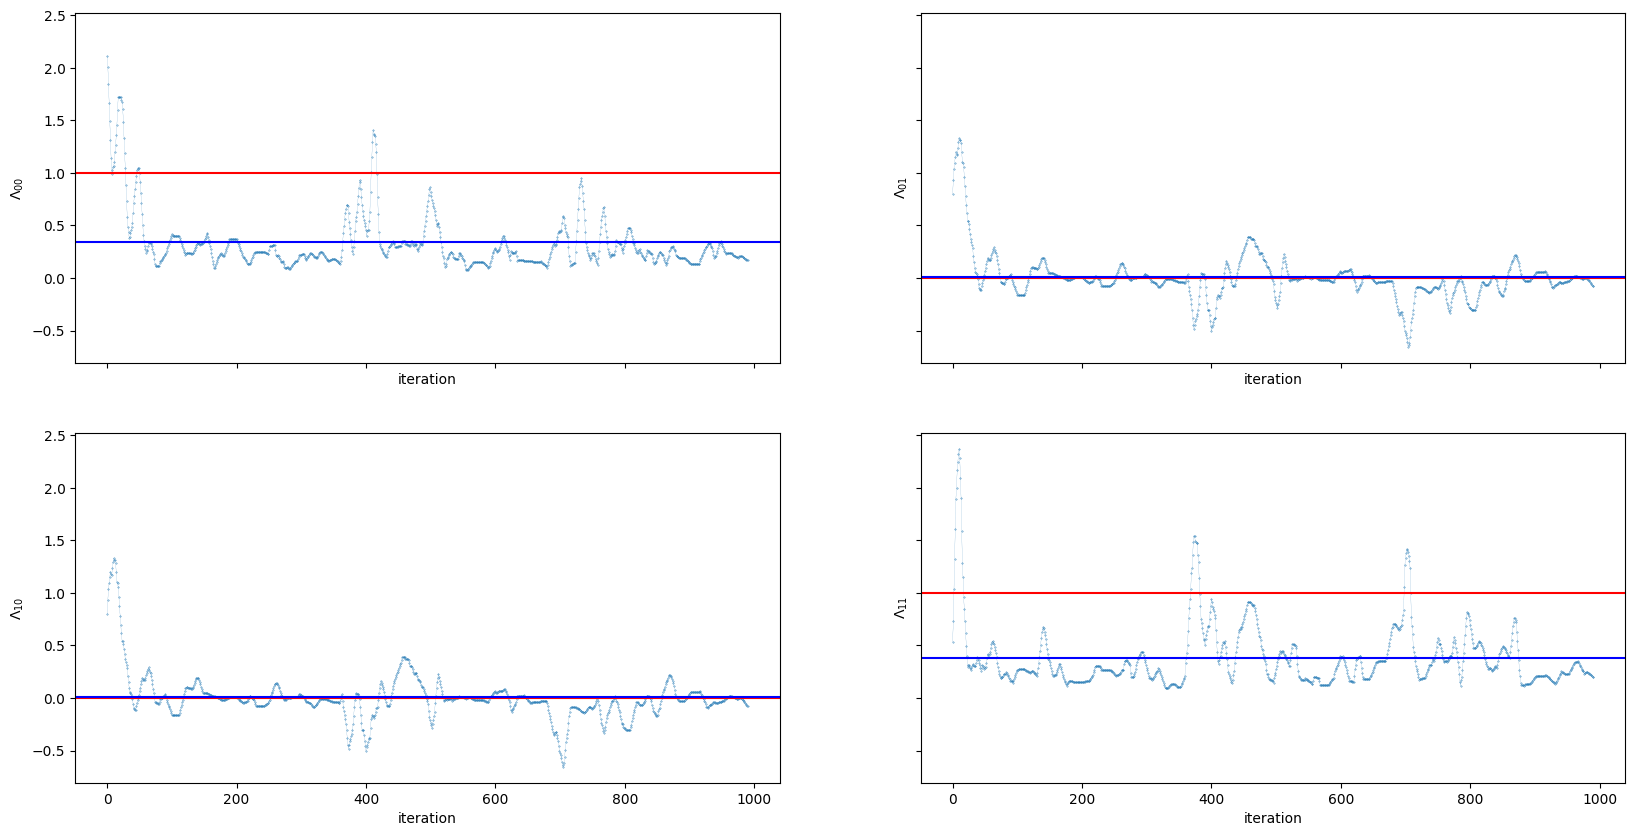

In [8]:
samples_mean_nojacobian, samples_var_nojacobian, tm, tv = plot_mcmc_marginals(n, V, K, samples_nojacobian, samples_invwishart)